# Welcome! To Code execution testing colab for Data Analysis Tasks!


In [ ]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive




---



**AFTER THIS POINT YOU CAN START WORKING**

---








Using this data:
ent_identifier	years_old	biological_sex	body_weight_in_pounds	height_in_inches	body_mass_index	medical_case_identifier	length_of_followup_in_months	clinical_diagnosis
12345	25	Female	150	60	25.0	67890	12	Diabetes
45678	35	Male	200	72	30.0	98765	24	Heart Disease
78901	45	Male	250	78	35.0	12345	36	Cancer
90123	55	Female	175	66	22.5	45678	48	Asthma
10234	65	Male	100	54	18.5	78901	60	Alzheimer's Disease
Please make a histogram of the age of patients. Each histogram bar should be divided into two sections with distinct colors representing male and female patients. Add an appropriate title and choose convinient number of bins for clarity in the visualization. Finally, add a legend to see what each color represents.

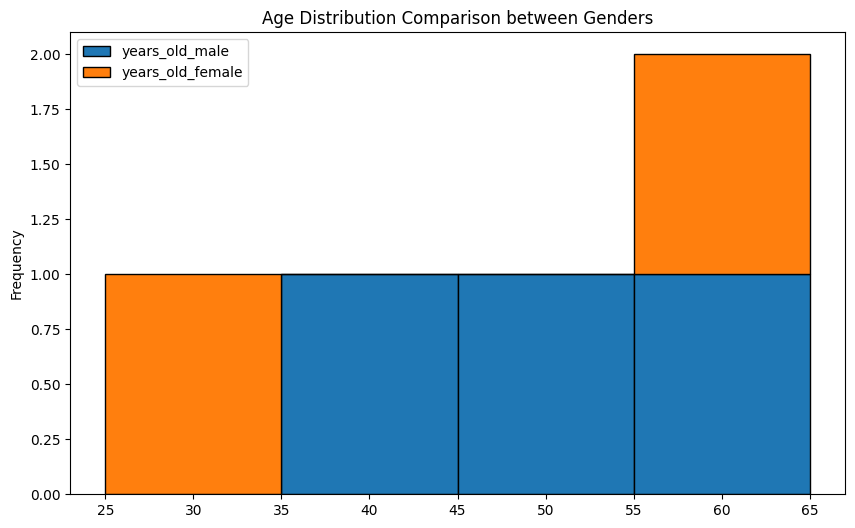

In [ ]:
import pandas as pd

# Load the dataset from a specified path
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_27patient_data.csv")

# Extract age data for males and females
df_age_male = df.loc[df['biological_sex'] == 'Male', ['years_old']].reset_index(drop=True)
df_age_female = df.loc[df['biological_sex'] == 'Female', ['years_old']].reset_index(drop=True)

# Rename columns for clarity
df_age_male.rename(columns={"years_old": "years_old_male"}, inplace=True)
df_age_female.rename(columns={"years_old": "years_old_female"}, inplace=True)

# Combine male and female age data
df = pd.concat([df_age_male, df_age_female], axis=1)

# Create a stacked histogram plot for age distribution
ax = df.plot.hist(stacked=True, bins=4, figsize=(10, 6), grid=False, edgecolor='black')

# Set the title for the plot
ax.set_title('Age Distribution Comparison between Genders')

# Display the plot
plt.show()


Sure! Here you have a histogram that shows the age distribution comparison between genders for all the patients in the dataset.

[image of the query]

I hope this helps you!

From the information in this dataset, what is the most common desease that affects women with weight greathen than 150?

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_27patient_data.csv")

# Filter by gender and weight
df = df[(df['biological_sex'] == 'Female') & (df['body_weight_in_pounds'] > 150)]

# Get the number of patients diagnosed with each disease
diseases_counts = df['clinical_diagnosis'].value_counts()

# Get the disease with highest patients count
most_common_disease = diseases_counts.index[0]

# Print the result
print(most_common_disease)


Asthma


Based only in the information from the file data_27patient_data.csv, if a patient has been diagnosed with Cancer, what is the expected gender of that patient?

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_27patient_data.csv")

# Filter by disease
df = df[df['clinical_diagnosis'] == 'Cancer']

# Get the number of patients diagnosed with Cacer for each gender
gender_counts = df['biological_sex'].value_counts()

expected_gender = gender_counts.index[0]

print(expected_gender)



Male


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_27patient_data.csv")

In [ ]:
import pandas as pd
import plotly.express as px

# Assume you have a DataFrame df with columns 'Year', 'Industry', and 'Total_Movies_Released'
# Load your data or create a sample DataFrame
data = {
    'Year': [2010, 2010, 2011, 2011, 2012, 2012],
    'Industry': ['Hollywood', 'Bollywood', 'Hollywood', 'Bollywood', 'Hollywood', 'Bollywood'],
    'Total_Movies_Released': [100, 50, 110, 70, 120, 60]
}

df = pd.DataFrame(data)

# Create an interactive line plot using Plotly Express
fig = px.line(df, x='Year', y='Total_Movies_Released', color='Industry', title='Total Movies Released by Industry Each Year')

# Add hover data to show the total number of movies released by each industry that year
fig.update_traces(texttemplate='%{y}', textposition='top center')

# Add a dropdown button to show/hide industries
industry_list = df['Industry'].unique()
buttons = [dict(label=industry, method='update', args=[{'visible': [industry == ind for ind in industry_list]}, {'title': f'Total Movies Released by {industry} Each Year'}]) for industry in industry_list]
buttons.append(dict(label='All', method='update', args=[{'visible': [True] * len(industry_list)}, {'title': 'Total Movies Released by Industry Each Year'}]))

fig.update_layout(updatemenus=[{'active': 0, 'buttons': buttons}])

# Show the interactive plot
fig.show()


In [ ]:
# Create a Pandas DataFrame.
import pandas as pd
import numpy as np
technologies= {
    'Courses':["Spark","PySpark","Spark","Python","PySpark"],
    'Fee' :[22000,25000,23000,24000,26000],
    'Duration':['30days','50days','30days','60days','35days']
          }
df = pd.DataFrame(technologies)
print(df)
df.sort_values(['Courses','Fee'],ascending=False).groupby('Courses').head(1)

   Courses    Fee Duration
0    Spark  22000   30days
1  PySpark  25000   50days
2    Spark  23000   30days
3   Python  24000   60days
4  PySpark  26000   35days


,Courses,Fee,Duration
2,Spark,23000,30days
3,Python,24000,60days
4,PySpark,26000,35days


In [ ]:
df.groupby(["Courses"])["Fee"].nlargest(3)

Courses   
PySpark  4    26000
         1    25000
Python   3    24000
Spark    2    23000
         0    22000
Name: Fee, dtype: int64

In [ ]:
df.groupby(['Courses'])['Fee'].sum().sort_values(ascending=False).head(3)

Courses
PySpark    51000
Spark      45000
Python     24000
Name: Fee, dtype: int64

In [ ]:
df.groupby(['Fee']).apply(lambda x: x.sort_values(['Courses'], ascending=False).head(3).drop('Fee', axis=1))

<ipython-input-140-aa2ee3412558>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby(['Fee']).apply(lambda x: x.sort_values(['Courses'], ascending=False).head(3).drop('Fee', axis=1))


,Courses,Duration
0,Spark,30days
1,PySpark,50days
2,Spark,30days
3,Python,60days
4,PySpark,35days
